In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_excel('ccrb_datatransparencyinitiative_20170207.xlsx', sheet_name = 1)

In [4]:
no_arr_no_sum = df[['Reason For Initial Contact', 'Encounter Outcome']] \
[df['Encounter Outcome'] == 'No Arrest or Summons'].groupby('Reason For Initial Contact').count() / \
len(df[df['Encounter Outcome'] == 'No Arrest or Summons'])

arrest = df[['Reason For Initial Contact', 'Encounter Outcome']] \
[df['Encounter Outcome'] == 'Arrest'].groupby('Reason For Initial Contact').count() / \
len(df[df['Encounter Outcome'] == 'Arrest'])

summons = df[['Reason For Initial Contact', 'Encounter Outcome']] \
[df['Encounter Outcome'] == 'Summons'].groupby('Reason For Initial Contact').count() / \
len(df[df['Encounter Outcome'] == 'Summons'])

outcome = no_arr_no_sum.merge(arrest, how = 'outer', left_index = True, right_index = True, \
                              suffixes = ('_no_arr_no_sum', '_arrest')).fillna(0)

outcome = outcome.merge(summons, how = 'outer', left_index = True, right_index = True).fillna(0)

outcome['percent_no_arrest_no_summon'] = (outcome['Encounter Outcome_no_arr_no_sum']) / \
    (outcome['Encounter Outcome_no_arr_no_sum'] + \
     outcome['Encounter Outcome_arrest'] + \
    outcome['Encounter Outcome'])

outcome['percent_arrest'] = (outcome['Encounter Outcome_arrest']) / \
    (outcome['Encounter Outcome_no_arr_no_sum'] + \
     outcome['Encounter Outcome_arrest'] + \
    outcome['Encounter Outcome'])
    
outcome['percent_summons'] = (outcome['Encounter Outcome']) / \
    (outcome['Encounter Outcome_no_arr_no_sum'] + \
     outcome['Encounter Outcome_arrest'] + \
    outcome['Encounter Outcome'])
    
outcome['range'] = np.arange(len(outcome.index))

b = outcome[['percent_no_arrest_no_summon', 'percent_arrest', \
             'percent_summons', 'range']].melt(id_vars=['range'], var_name='encounter')

/Users/B/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


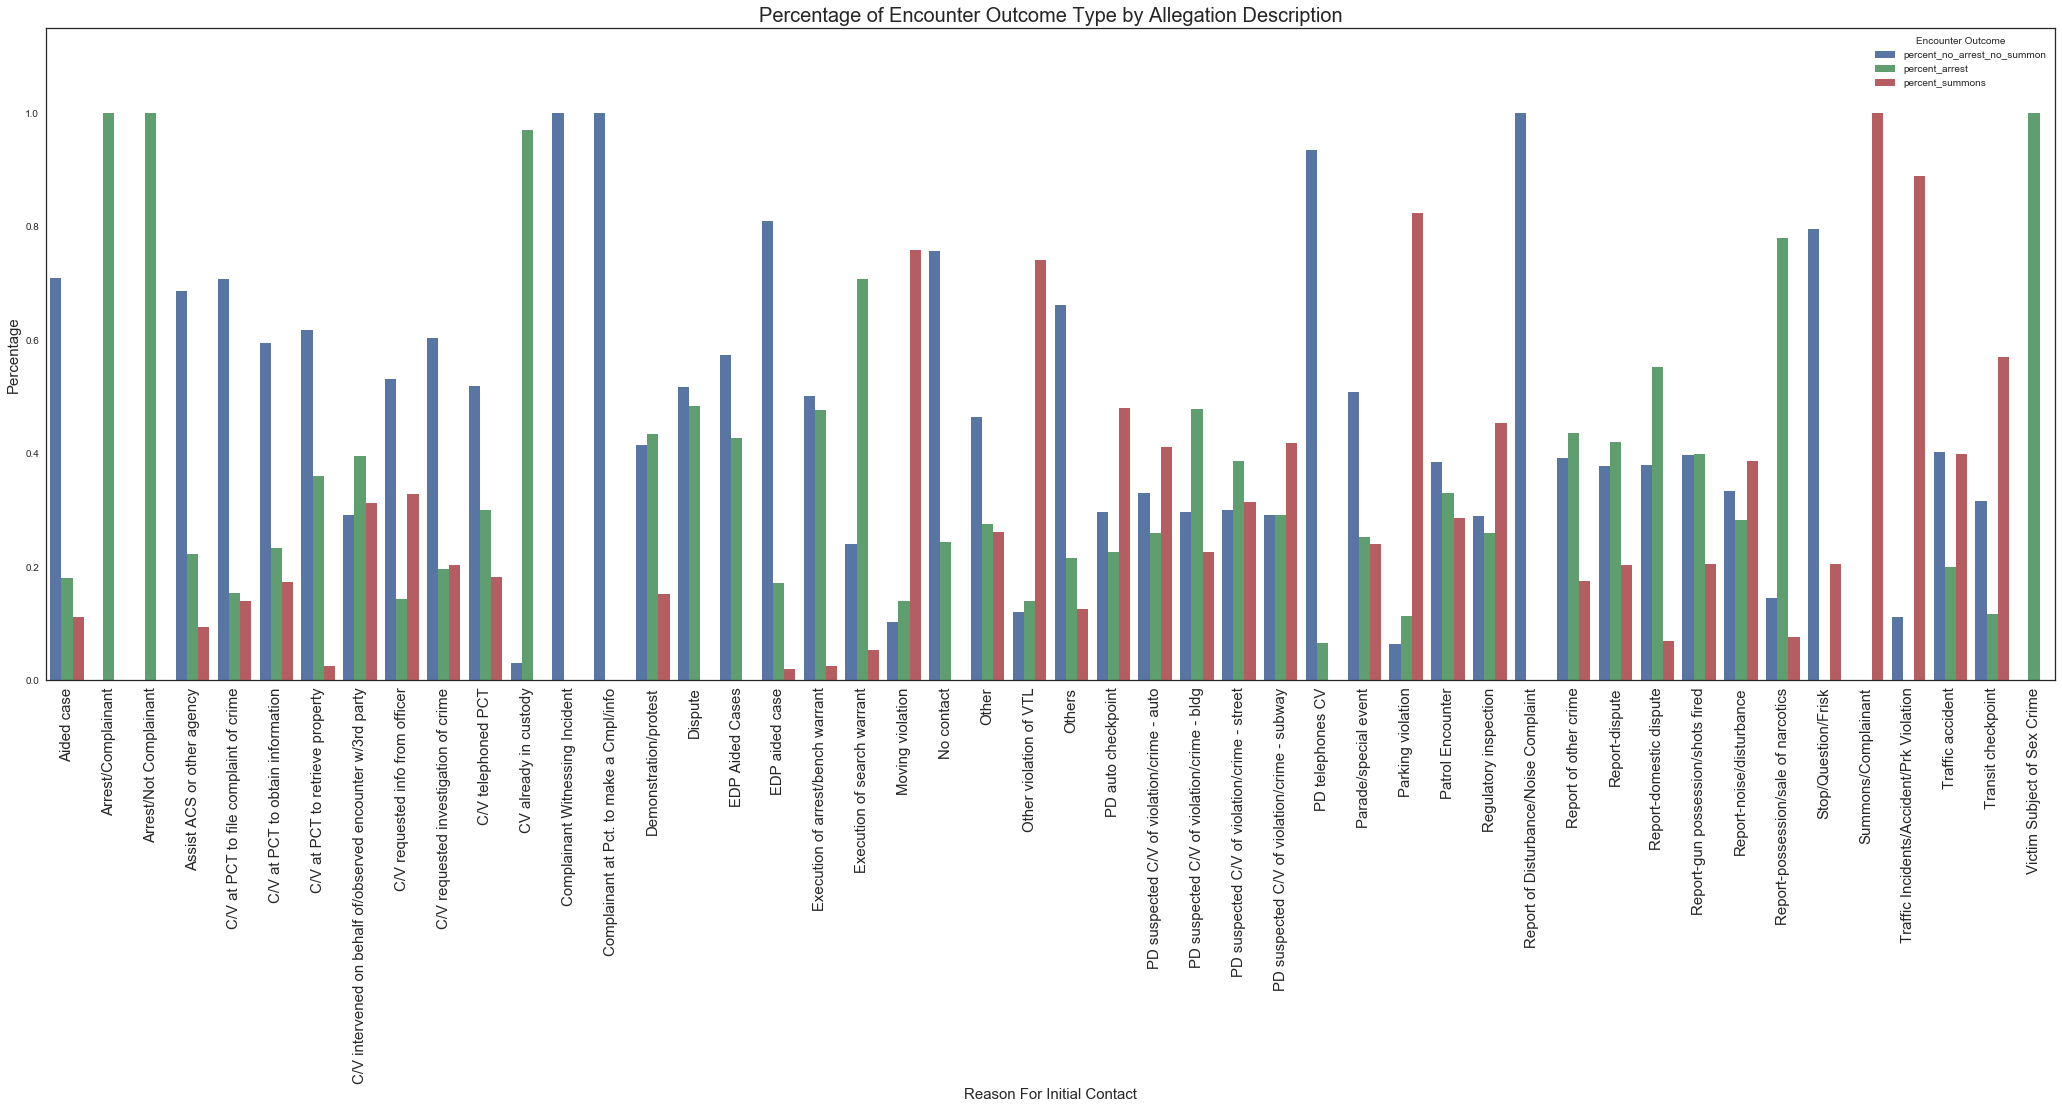

In [7]:
plt.figure(figsize = (36, 12))
sns.barplot(x="range", y="value", hue="encounter", data = b);
plt.xticks(np.arange(len(outcome.index)), tuple(outcome.index), rotation = 90, size = 15);
plt.xlabel('Reason For Initial Contact', size = 15);
plt.ylabel('Percentage', size = 15);
plt.ylim(0, 1.15);
plt.legend(title = 'Encounter Outcome');
plt.title('Percentage of Encounter Outcome Type by Allegation Description', size = 20);

plt.savefig('plot2.png', dpi=600, bbox_inches = 'tight')